# Adaptive PMC ABC
This example shows you how to perform adaptive PMC ABC on a time series from the stochastic degradation model.


In [1]:
import pints
import pints.toy as toy
import pints.plot
import pints.toy.stochastic
import numpy as np
import matplotlib.pyplot as plt

# Load a forward model
model = toy.stochastic.DegradationModel()

# Create some toy data
real_parameters = model.suggested_parameters()
times = np.linspace(0, 10, 20)
values = model.simulate(real_parameters, times)

# Create an object with links to the model and time series
problem = pints.SingleOutputProblem(model, times, values)

# Create a uniform prior parameter
log_prior = pints.UniformLogPrior([0.0], [0.3])


# Set the error measure to be used to compare simulated to observed data
error_measure = pints.RootMeanSquaredError(problem)

## Fit using Rejection ABC

In [15]:
abc = pints.ABCController(error_measure, log_prior, method=pints.ABCAdaptivePMC)

# set threshold
abc.sampler().set_N_l(10)

# set p_acc_min
abc.sampler().set_p_acc_min(0.01)

# set target number of samples
abc.set_nr_samples(20)

# log to screen
abc.set_log_to_screen(True)

print('Running...')
samples  = abc.run()
print('Done')

Running...
Using ABC-Adaptive-PMC
Running in sequential mode.
epsilon=3.361547262794322
epsilon=2.569046515733026
epsilon=2.3345235059857505
epsilon=2.224859546128699
epsilon=2.0
epsilon=1.97484176581315
epsilon=1.91049731745428
Iter. Eval. Acceptance rate Time m:s
1     9      2.222222222222   0:00.3
Halting: target number of samples (20) reached.
Done


## Plot approximate posterior vs actual parameter value

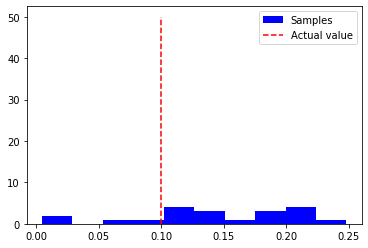

In [16]:
plt.hist(samples[:,0], color="blue", label="Samples")
plt.vlines(x=model.suggested_parameters(), linestyles='dashed', ymin=0, ymax=50, label="Actual value", color="red")
plt.legend()
plt.show()